<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/series_temporais-naive_adfuller_arima_prophet-suicide_rates_overview_1985_to_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 


#DESCRIÇÃO DA PROBLEMÁTICA
Esse notebook consiste em descrever os dados das taxas de suicídio mundial. No database o conjunto de dados 
> compara informações socioeconômicas com taxas de suicídio por ano e país.

As variáveis do banco de dados analisado no arquivo *master.csv* são:
*   **country**: país;
*   **year**: ano;
*   **sex**: gênero sexual;
*   **age**: idade;
*   **suicides_no**: número de suicídios para o grupo com os quatro parâmetros anteriores definidos;
*   **population**: população do país;
*   **suicides/100k pop**: taxa de suicídios por 100 mil habitantes;
*   **country-year** ano do país;
*   **HDI for year**:índice de HID para o ano;
*   **gdp_for_year ($)**: ;







#OBTENÇÃO DOS DADOS
Nessa etapa é descrito duas formas de obter os dados. Deve ser escolhida apenas uma e atentar para quais linhas podem ser executadas sempre ou não.



##Kaggle e Google Drive
> Para realizar esse método é necessário ter uma conta no Kaggle e ter configurado o seu Google Drive para executar o download.


No código a seguir são realizadas as seguintes ações:
1.   conexão com o google drive;

2.   download dos dados obtidos no [Kaggle - Database - Suicide Rates Overview 1985 to 2016](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) para o drive (apenas na primeira vez);

3.   atribuição destes dados à variável *data* com o biblioteca pandas.

In [ ]:
# # 1
# from google.colab import drive
# drive.mount('/content/gdrive')
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# %cd /content/gdrive/My Drive/Kaggle/suicide-rates-overview-1985-to-2016/

# # 2
# #descomentar apenas para o primeiro download
# # ! kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016
# # !unzip \*.zip  && rm *.zip

# # 3
# data=pd.read_csv('/content/gdrive/My Drive/Kaggle/suicide-rates-overview-1985-to-2016/master.csv')

## GitHub

Além disso, também disponibilizei uma cópia dos dados do Kaggle no meu GitHub.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/suicide-rates-overview-1985-to-2016/master.csv')

# TRATAMENTO DOS DADOS

Nessa etapa são realizadas diversas análises para conseguir identificar quais modificações podem ser realizadas nos dados para conseguir manipular eles e adquirir *insights*. Primeiro observamos que o Dataframe é composto de 12 variáveis e 27820 dados,

In [ ]:
print('Dimensão do DataFrame')
print("variáveis: ", data.shape[1])
print("dados:     ", data.shape[0])

Dimensão do DataFrame
variáveis:  12
dados:      27820


Observamos também os primeiros dados do DataFrame,

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Observamos também o tipo das variáveis,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


As primeiras modificações que iremos realizar vai ser transformar os dados de object para um tipo de dado mais convencional como int, float ou string. Inicialmente convertemos as variáveis para string.

In [ ]:
data['country'] = data['country'].convert_dtypes()
data['sex'] = data['sex'].convert_dtypes()
data['country-year'] = data['country-year'].convert_dtypes()
data['generation'] = data['generation'].convert_dtypes()

Analisando os valores únicos de age verificamos que os dados são descritos em faixas etárias, logo, ajustamos o valor destas para a média e atribuímos os valores como inteiros ao dataframe.

In [ ]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
data.loc[(data['age'] == '5-14 years'), 'age'] = 10
data.loc[(data['age'] == '15-24 years'), 'age'] = 20
data.loc[(data['age'] == '25-34 years'), 'age'] = 30
data.loc[(data['age'] == '35-54 years'), 'age'] = 45
data.loc[(data['age'] == '55-74 years'), 'age'] = 65
data.loc[(data['age'] == '75+ years'), 'age'] = 80
data['age'] = data['age'].astype(int)
data['age'].unique()

array([20, 45, 80, 30, 65, 10])

Para a variável gdp_for_year ($) removemos alguns caracteres especiais e convertemos o valor para inteiro.

In [ ]:
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].convert_dtypes()
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',', '')
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].astype(int)

A variável ano consiste em um valor do tipo temporal, logo, realizamos a conversão e verificamos novamento as informações das variáveis com o método info().

In [ ]:
data['year'] = pd.to_datetime(data['year'].astype(str), format="%Y")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             27820 non-null  string        
 1   year                27820 non-null  datetime64[ns]
 2   sex                 27820 non-null  string        
 3   age                 27820 non-null  int64         
 4   suicides_no         27820 non-null  int64         
 5   population          27820 non-null  int64         
 6   suicides/100k pop   27820 non-null  float64       
 7   country-year        27820 non-null  string        
 8   HDI for year        8364 non-null   float64       
 9    gdp_for_year ($)   27820 non-null  int64         
 10  gdp_per_capita ($)  27820 non-null  int64         
 11  generation          27820 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(5), string(4)
memory usage: 2.5 MB


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987-01-01,male,20,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987-01-01,male,45,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987-01-01,female,20,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987-01-01,male,80,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987-01-01,male,30,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014-01-01,female,45,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014-01-01,female,80,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014-01-01,male,10,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014-01-01,female,10,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


Obtendo o somatório dos dados que são nulos temos apenas a variável HDI for year apresentando valor percentual de valores nulos. Por ser um valor considerável de 69,93%, essa variável será desconsiderada posteriormente para análise.

In [ ]:
data.isnull().mean()

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k pop     0.000000
country-year          0.000000
HDI for year          0.699353
 gdp_for_year ($)     0.000000
gdp_per_capita ($)    0.000000
generation            0.000000
dtype: float64

Já obtendo os valores únicos para cada variável verificamos alguns variáveis categóricas como: sex, age e generation.

In [ ]:
data.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

#DESCRIÇÃO DOS DADOS

Nessa etapa vamos descrever os dados para conseguir entender e obter análises quantitativas do dataframe. Essa descrição é realizada diante das variáveis temporais, categóricas e de identificação, além de analisar a correlação dos dados. Antes de iniciar a análise, como se tratam de dados temporais de todos os países verificamos a quantidade de países que participaram entre os anos 1985 e 2016. 

De início percebemos que esse valor oscilou bastante,


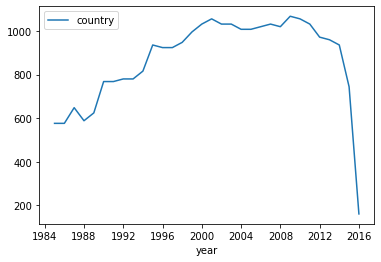

In [ ]:
data_country = data[['country', 'year']].groupby('year').count()
sns.lineplot(data=data_country)

Desse modo, selecionamos todos os países que participaram da pesquisa e dentro de um laço for verificamos se os dados agrupados por ano daquele país específico tinha 31 linhas (valor correspondente ao período de 31 anos). 

Quando a essa condição é atendida significa que o país possui possui dados dos índices de suicídio para todos os anos da pesquina, logo, ele será considerado para as próximas análises.

Ao plotar o mesmo gráfico anterior já verificamos que a nova seleção para data possui a quantidade de países constante.

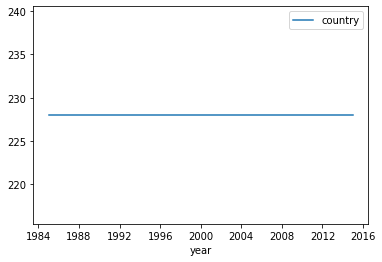

In [ ]:
country = data['country'].unique()
country_31 = pd.DataFrame()
for c in country:
  data_country = data[data['country'] == c].groupby('year').count()
  if data_country.shape[0] == 31:
    country_31 = country_31.append(data[data['country'] == c])
# # sns.barplot(data = data_country)
data = country_31
data_country = data[['country', 'year']].groupby('year').count()
sns.lineplot(data=data_country)

##Variáveis temporais e categóricas

Para conseguir visualizar como os dados se comportam ao longo dos anos construímos gráficos do tipo lineplot e para os dados categóricos construímos gráficos do tipo barplot.

Realizando as análises para o parâmetro mundial e comparando no mesmo gráfico com os dados do Brazil temos,

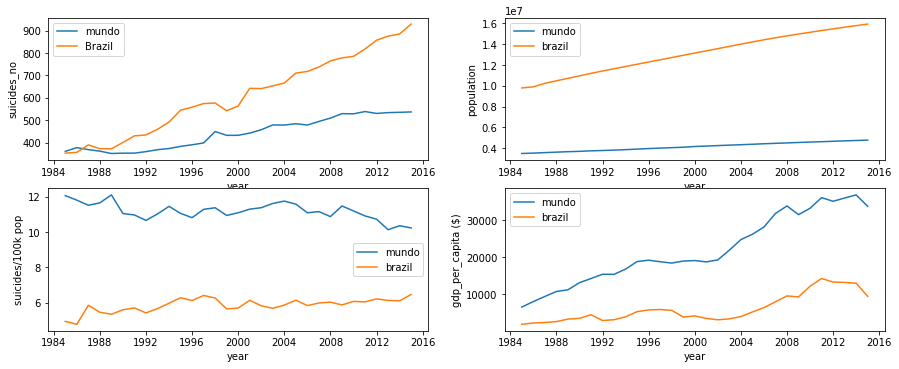

In [ ]:
data_brasil=data[data.country == 'Brazil']
fig, axes = plt.subplots(2, 2, figsize=(15, 3), sharey=False)
fig.subplots_adjust( bottom=0.05, top=1.5)

d = data.groupby('year')['suicides_no'].mean()
db = data_brasil.groupby('year')['suicides_no'].mean()
sns.lineplot(data=d,ax=axes[0, 0], label='mundo',estimator=None)
sns.lineplot(data=db,ax=axes[0, 0], label='Brazil',estimator=None)

d = data.groupby('year')['population'].mean()
db = data_brasil.groupby('year')['population'].mean()
sns.lineplot(data=d, label='mundo',ax=axes[0, 1],estimator=None)
sns.lineplot(data=db, label='brazil',ax=axes[0, 1],estimator=None)

d = data.groupby('year')['suicides/100k pop'].mean()
db = data_brasil.groupby('year')['suicides/100k pop'].mean()
sns.lineplot(data=d, label='mundo',ax=axes[1, 0],estimator=None)
sns.lineplot(data=db, label='brazil',ax=axes[1, 0],estimator=None)

d = data.groupby('year')['gdp_per_capita ($)'].mean()
db = data_brasil.groupby('year')['gdp_per_capita ($)'].mean()
sns.lineplot(data=d, label='mundo',ax=axes[1, 1],estimator=None)
sns.lineplot(data=db, label='brazil',ax=axes[1, 1],estimator=None)


Desse podem percebemos que o número de suicídios cresceu no mundo ao longo dos anos, mas no Brazil houve uma pequena queda nesses números, a população mundial também apresentou crescimento com uma inclinação maior do que no Brasil.

Por outro lado, quando observamos o número de suicídios por 100 habitantes observamos que no mundo esse valor apresentou uma pequena queda, enquanto o Brasil apresenta um valor constante/crescente. Já o valor de Gross Domestic Product apresentou uma ocilação crescente, mas com alguns locais de queda como no início dos anos 2000 e 2008. Esses valores possuem grande indicativo de serem decorrentes de algumas crises econômicas mundais. [+ info](https://www.infoescola.com/economia/crises-economico-financeiras-de-1991-a-2011/)

Também analisamos a relação do número de casos de suicídio com a faixa etária onde percemos que o maior número de casos concentra-se em pessoas com 45 anos. Já em relação à geração, o número de casos é maior para Boomers e em relação ao sexo é maior para o sexo masculino.


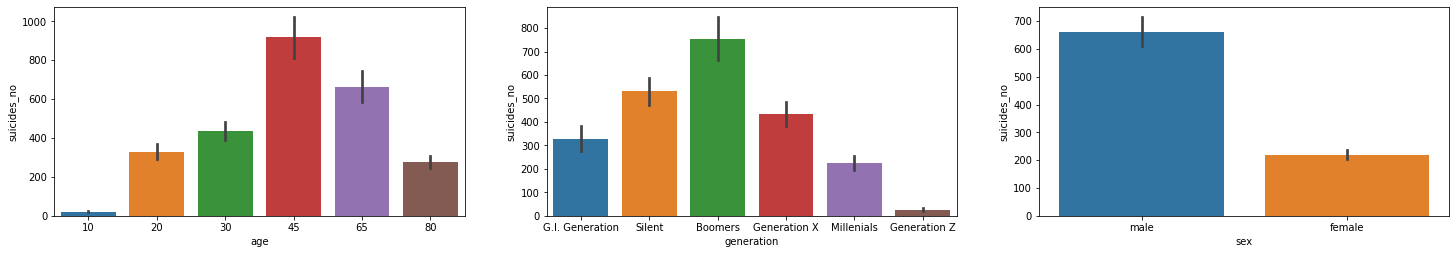

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 2), sharey=False)
fig.subplots_adjust( bottom=0.05, top=1.5)
sns.barplot(y=data['suicides_no'], x=data['age'], ax=axes[0])
sns.barplot(y=data['suicides_no'], x=data['generation'],ax=axes[1])
sns.barplot(y=data['suicides_no'], x=data['sex'],ax=axes[2])


A mesma análise anterior é realizada particionando o número de casos em perídos temporais de cinco anos.

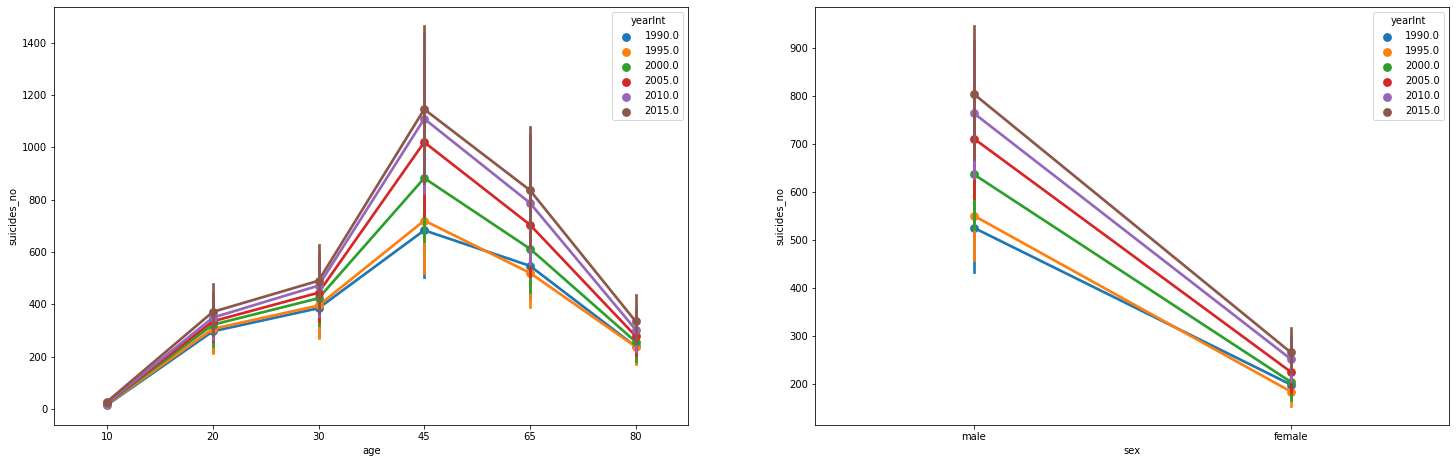

In [ ]:
data.loc[((data['year'].dt.year > 1984) & (data['year'].dt.year <= 1990)), 'yearInt'] = 1990
data.loc[((data['year'].dt.year > 1990) & (data['year'].dt.year <= 1995)), 'yearInt'] = 1995
data.loc[((data['year'].dt.year > 1995) & (data['year'].dt.year <= 2000)), 'yearInt'] = 2000
data.loc[((data['year'].dt.year > 2000) & (data['year'].dt.year <= 2005)), 'yearInt'] = 2005
data.loc[((data['year'].dt.year > 2005) & (data['year'].dt.year <= 2010)), 'yearInt'] = 2010
data.loc[((data['year'].dt.year > 2010) & (data['year'].dt.year <= 2015)), 'yearInt'] = 2015

# data['yearInt'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25, 4), sharey=False)
fig.subplots_adjust( bottom=0.05, top=1.5)
sns.pointplot(y=data['suicides_no'], x=data['age'], hue=data['yearInt'], ax=axes[0])
# sns.pointplot(y=data['suicides_no'], x=data['generation'], hue=data['yearInt'],ax=axes[1])
sns.pointplot(y=data['suicides_no'], x=data['sex'], hue=data['yearInt'],ax=axes[1])

Ao obervar o número de casos em todos os países com dados referente aos últimos 31 anos temos EUA, Japão e República da coreia com os maiores números.

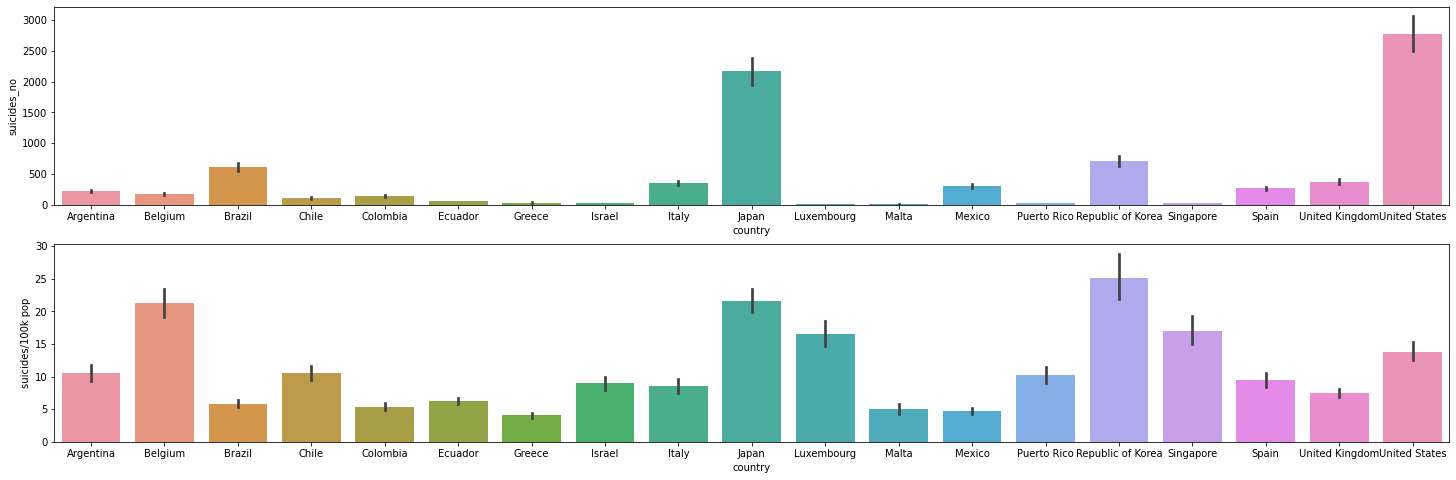

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=False)
sns.barplot(y=data['suicides_no'], x=data['country'], ax=axes[0])
sns.barplot(y=data['suicides/100k pop'], x=data['country'], ax=axes[1])

#Correlação

Ao analisar a correlação observamos que as variáveis que mais se correlacionam são 

suicides_no - population, 

suicides_no - gdp_for_year ($), 

population - gdp_for_year ($).


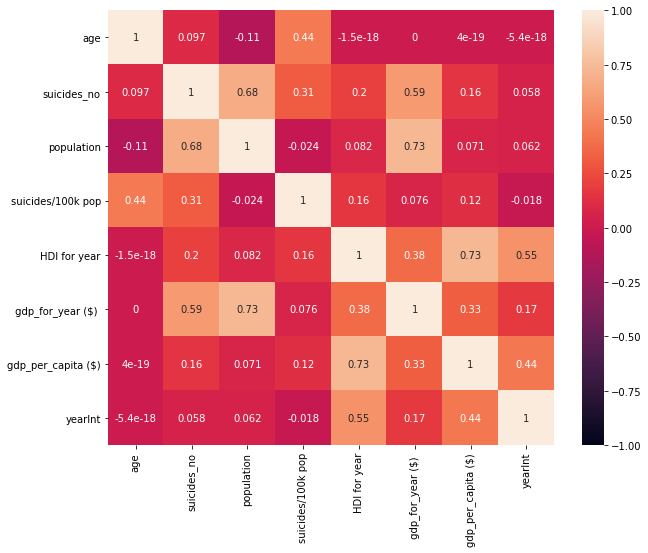

In [ ]:
plt.figure(figsize = (10,8))
fig = sns.heatmap(data.corr(), vmax=1, vmin=-1, annot = True)

#TÉCNICAS PARA SÉRIES TEMPORAIS 

In [ ]:
#naive com média móvel
train = pd.DataFrame()
train['data'] = data_brasil.year[data_brasil.year.dt.year < 2010].copy()
train['num'] = data_brasil.suicides_no[data_brasil.year.dt.year < 2010].copy()
train.set_index('data', inplace=True)
train = train.groupby('data').sum()
valid = pd.DataFrame()
valid['data'] = data_brasil.year[data_brasil.year.dt.year >= 2010].copy()
valid['num'] = data_brasil.suicides_no[data_brasil.year.dt.year >= 2010].copy()
valid.set_index('data', inplace=True)
valid = valid.groupby('data').sum()
# valid = data_brasil[data_brasil.year.dt.year > 2010].copy()
y_hat_naive = valid.copy()
y_hat_naive['naive'] = train.iloc[-1].values[0]

y_hat_naive['naive_med'] = train.num.rolling(5).mean().iloc[-1]
y_hat_naive

,num,naive,naive_med
data,,,
2010-01-01,9429,9346,8906.4
2011-01-01,9822,9346,8906.4
2012-01-01,10295,9346,8906.4
2013-01-01,10513,9346,8906.4
2014-01-01,10631,9346,8906.4
2015-01-01,11163,9346,8906.4


In [ ]:
# train.tail(13)
# test = train.groupby('data').sum()
# test

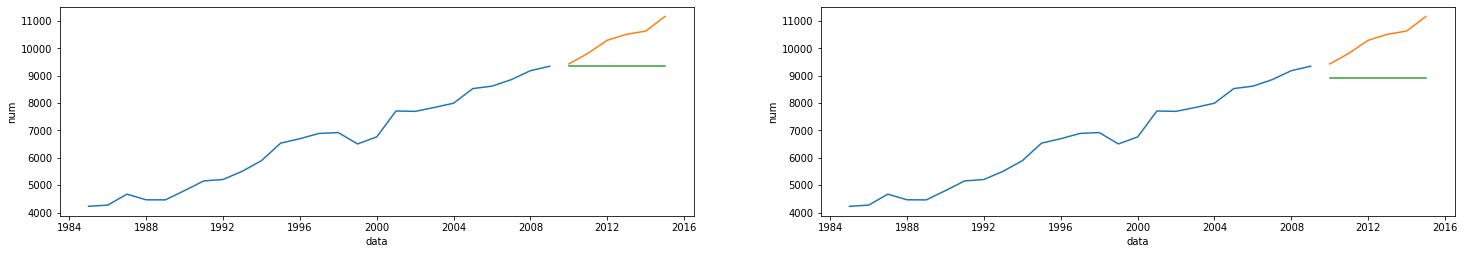

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 2), sharey=False)
fig.subplots_adjust( bottom=0.05, top=1.5)
sns.lineplot(y=train['num'], x=train.index, ax=axes[0],estimator=None)
sns.lineplot(y=valid['num'], x=valid.index, ax=axes[0],estimator=None)
sns.lineplot(y=y_hat_naive['naive'], x=y_hat_naive.index, ax=axes[0],estimator=None)

sns.lineplot(y=train['num'], x=train.index, ax=axes[1],estimator=None)
sns.lineplot(y=valid['num'], x=valid.index, ax=axes[1],estimator=None)
sns.lineplot(y=y_hat_naive['naive_med'], x=y_hat_naive.index, ax=axes[1],estimator=None)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt

In [ ]:
result = seasonal_decompose(train, freq=12)

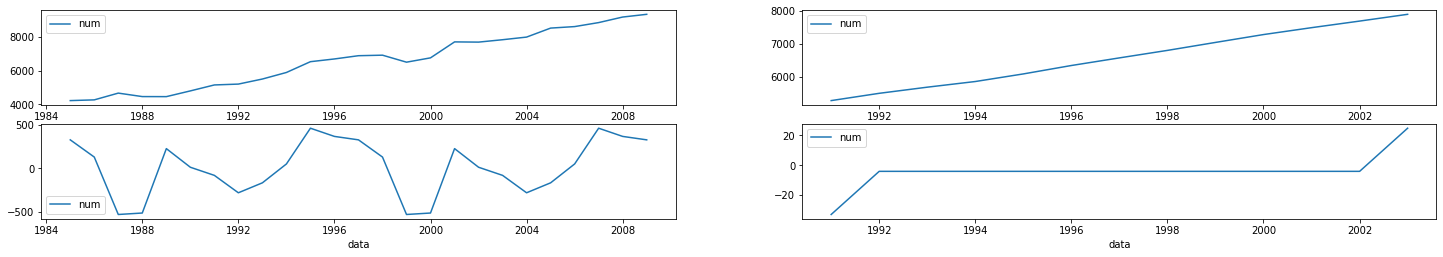

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(25, 2), sharey=False)
fig.subplots_adjust(bottom=0.05, top=1.5)
sns.lineplot(data=result.observed,estimator=None, ax=axes[0,0])
sns.lineplot(data=result.trend, estimator=None, ax=axes[0,1])
sns.lineplot(data=result.seasonal, estimator=None, ax=axes[1, 0])
sns.lineplot(data=result.resid, estimator=None, ax=axes[1,1])

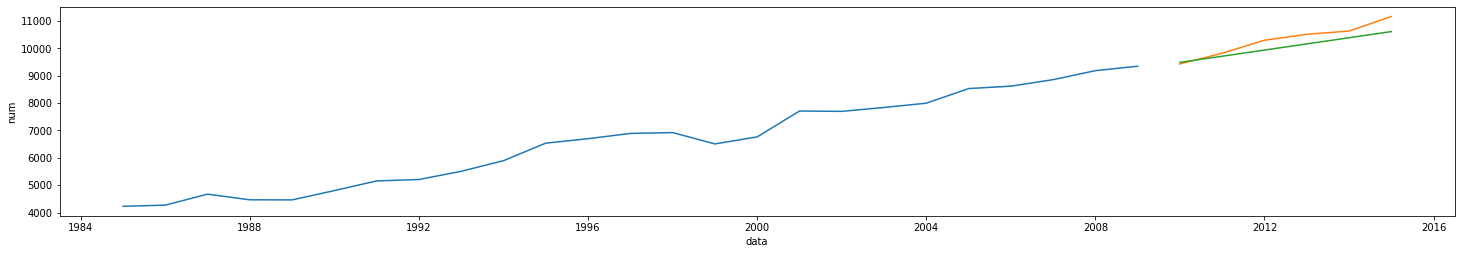

In [ ]:
y_hat_naive['holt'] = Holt(train.num.to_numpy()).fit(smoothing_level=0.1, smoothing_slope=0.1).forecast(len(valid.num.to_numpy()))
y_hat_naive['holt']
# train.num.to_numpy
fig, axes = plt.subplots(figsize=(25, 2), sharey=False)
fig.subplots_adjust( bottom=0.05, top=1.5)
sns.lineplot(y=train['num'],estimator=None, x=train.index)
sns.lineplot(y=valid['num'],estimator=None, x=valid.index)
sns.lineplot(y=y_hat_naive['holt'],estimator=None, x=y_hat_naive.index)

In [ ]:
# importar o teste ADF
from statsmodels.tsa.stattools import adfuller

# importar os dados como sendo coluna única
df_est = train.num.to_numpy()

# extrair apenas os valores
# X = df_est.values

# aplicar ADF e imprimir o resultado
result = adfuller(df_est)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -0.8460
Valor-p: 0.8052
Valores Críticos:
	1%: -3.9644
	5%: -3.0849
	10%: -2.6818


Dickey-Fuller Aumentado
Teste Estatístico: -2.1940
Valor-p: 0.2084312492
Valores Críticos:
	1%: -3.8893
	5%: -3.0544
	10%: -2.6670


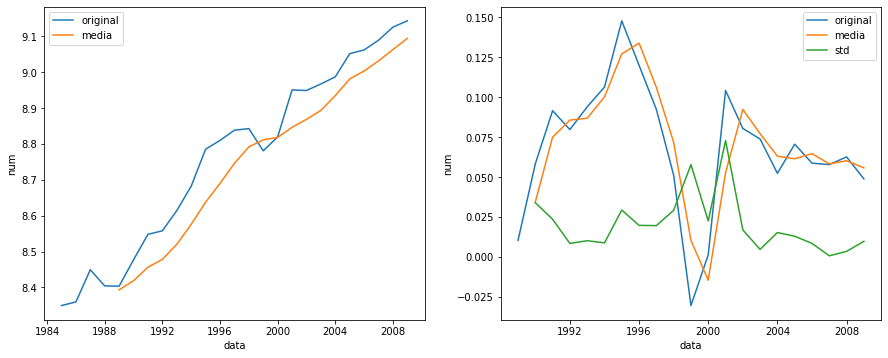

In [ ]:
# fig, ax = plt.subplots()
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharey=False)
fig.subplots_adjust( bottom=0.05, top=1.5)

train_log = np.log(train)
log = np.log(train).rolling(5).mean()
sns.lineplot(y=train_log.num, x=train_log.index, label='original', ax=axes[0])
sns.lineplot(y=log.num, x=log.index, label='media', ax=axes[0])

sub = (train_log - log).dropna()
ma_sub = sub.rolling(2).mean()
std_sub = sub.rolling(2).std()
sns.lineplot(y=sub.num, x=sub.index, label='original', ax=axes[1])
sns.lineplot(y=ma_sub.num, x=ma_sub.index, label='media', ax=axes[1])
sns.lineplot(y=std_sub.num, x=std_sub.index, label='std', ax=axes[1])

# train.plot(ax=0, legend='original')
# ma.plot(ax=0, legend='média')
# log.plot(ax=1, color='r', legend='log')
# plt.tight_layout()
# train_log

# repetir o ADF
X_sub = sub.num.values

# aplicar ADF e imprimir o resultado
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

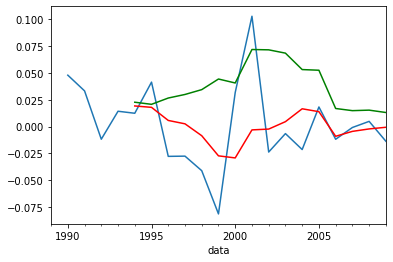

Dickey-Fuller Aumentado
Teste Estatístico: -3.3037
Valor-p: 0.0147139954
Valores Críticos:
	1%: -4.2232
	5%: -3.1894
	10%: -2.7298


In [ ]:

# aplicar diferenciação
diff = sub.diff(1)
ma_diff = diff.rolling(5).mean()
std_diff = diff.rolling(5).std()

fig, ax = plt.subplots()
diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.show()

# extrair apenas os valores
X_diff = diff.num.dropna().values

# aplicar ADF e imprimir o resultado
result_diff = adfuller(X_diff)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_diff[4].items():
	print('\t{}: {:.4f}'.format(key, value))

In [ ]:
diff.shape

(21, 1)

In [ ]:

# melhores parâmetros para o nosso modelo
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(diff.dropna(), nlags=25)
lag_pacf = pacf(diff.dropna(), nlags=25)


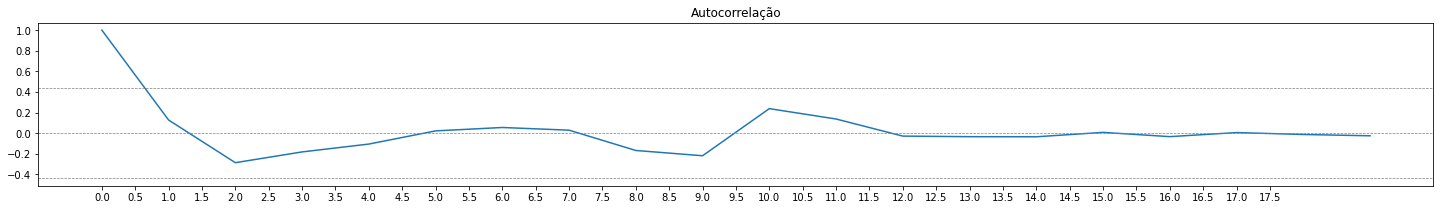

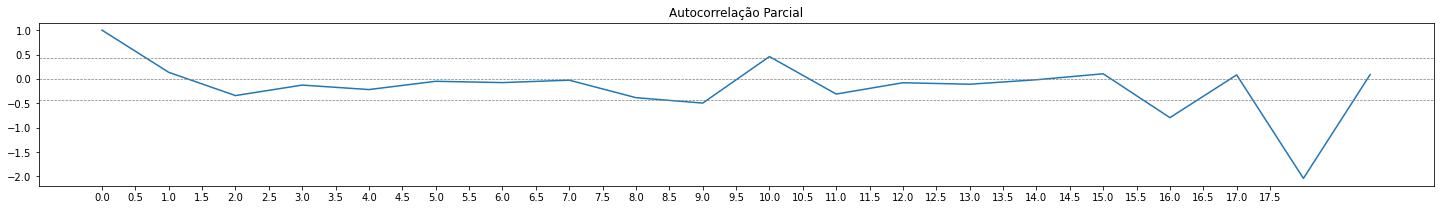

In [ ]:
fig, axes = plt.subplots(figsize=(25, 3), sharey=False)

# plotar ACR e PACF
plt.plot(lag_acf)
plt.xticks(np.arange(0, 18, step=0.5))
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((diff.shape[0] - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((diff.shape[0] - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")
plt.show()
fig, axes = plt.subplots(figsize=(25, 3), sharey=False)

plt.plot(lag_pacf)
# locs, labels = xticks()
plt.xticks(np.arange(0, 18, step=0.5))
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((diff.shape[0] - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((diff.shape[0] - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

In [ ]:

# treinar o modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log.dropna(), order=(0,1, 0))
result_AR = model.fit(disp = -1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


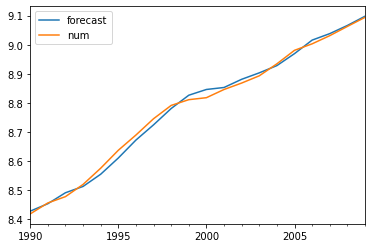

In [ ]:
result_AR.plot_predict();


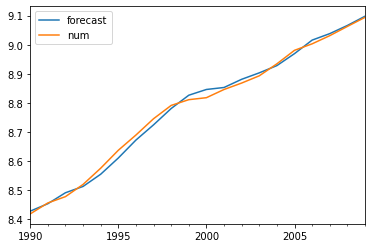

In [ ]:
result_AR.plot_predict();


In [ ]:
# from scipy.optimize import brute
# grid = (slice(1, 3, 1), slice(1, 3, 1), slice(1, 3, 1))
# brute(objfunc, grid, args=(exog, endog), finish=None)

In [ ]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 5.4MB/s 


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=345.319, BIC=352.388, Fit time=0.216 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=340.627, BIC=342.984, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=342.506, BIC=346.040, Fit time=0.016 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=342.270, BIC=345.804, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=344.607, BIC=349.319, Fit time=0.079 seconds
Total fit time: 0.366 seconds


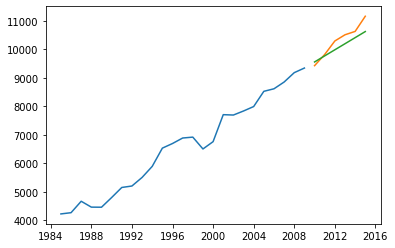

In [ ]:
#building the model
from pyramid.arima import auto_arima
m = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
m.fit(train)

forecast = m.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
m

#Prophet

Como os dados se tratam de dados temporais vamos analisar os dados com o Prophet para prever o número de suicídios até o ano de 2020.

> Prophet é um procedimento para prever dados de série temporal com base em um modelo aditivo em que tendências não lineares são ajustadas com sazonalidade anual, semanal e diária, além de efeitos de feriados. Funciona melhor com séries temporais que têm fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto para dados ausentes e mudanças na tendência, e normalmente lida bem com outliers.


In [ ]:
import pandas as pd
from fbprophet import Prophet
ds = data_brasil[['suicides_no', 'year']].groupby('year').sum()
ds.columns = ['y']
ds.index.rename('ds', inplace=True)
ds.reset_index(inplace=True)
# ds

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


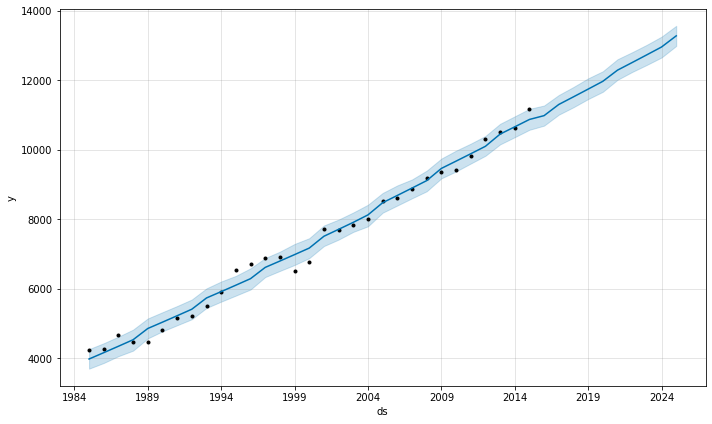

In [ ]:
m = Prophet().fit(ds)
future = m.make_future_dataframe(periods=10, freq='Y', include_history=True)
# future
fcst = m.predict(future)
fig = m.plot(fcst)

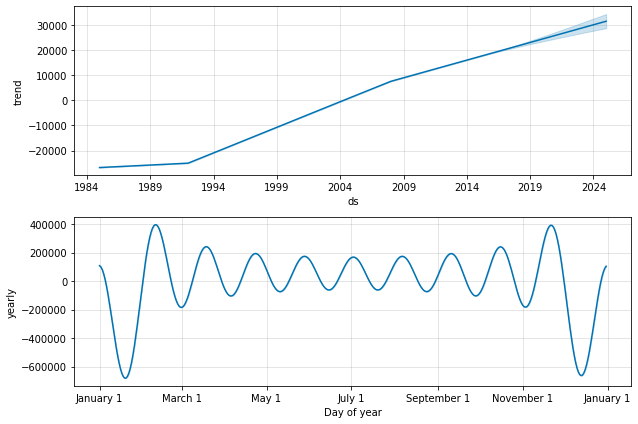

In [ ]:
# future = m.make_future_dataframe(periods=365)
# future.tail()
# forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# sns.lineplot(x=forecast['ds'], y=forecast['yhat'])

# fcst = m.predict(ds)
fig = m.plot_components(fcst)


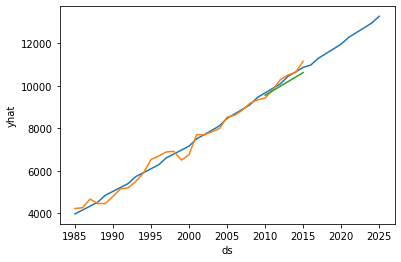

In [ ]:
sns.lineplot(x=fcst.ds, y=fcst.yhat,estimator=None)
sns.lineplot(x=ds.ds, y=ds.y,estimator=None)
sns.lineplot(x=forecast.index, y=forecast.Prediction,estimator=None)



In [ ]:
# fig1 = m.plot(forecast)
# fcst
# forecast

In [ ]:
# fig2 = m.plot_components(forecast)


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '10 days')
df_cv.head()

INFO:fbprophet:Making 29 forecasts with cutoffs between 1986-12-22 00:00:00 and 2014-12-22 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprop

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1987-01-01,90272.724335,90272.723717,90272.724998,83921,1986-12-22
1,1988-01-01,80263.036937,78636.982575,81252.434556,82383,1987-12-22
2,1989-01-01,147907.789781,146634.919436,149513.963225,79979,1988-12-22
3,1990-01-01,78240.188622,77111.101359,79225.629803,80314,1989-12-22
4,1991-01-01,80054.893299,79205.342470,81277.394093,80339,1990-12-22


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,1.717913e+08,13106.917557,4914.614549,0.054555,0.01959,0.517241


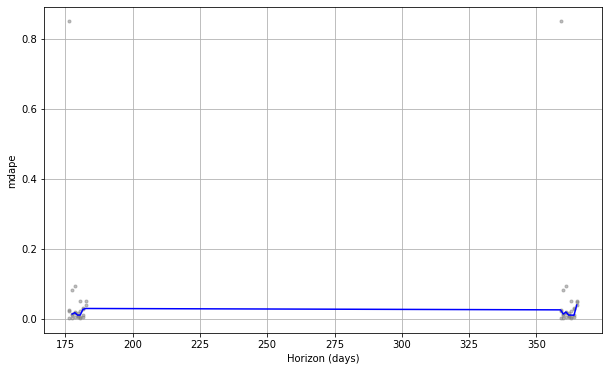

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')